# Perceptron

In [1]:
from random import choice
from numpy import array, dot, random

In [2]:
%matplotlib inline

<img src="https://camo.githubusercontent.com/d21f31df591325b807838aa3d38645ec2634dc7b/687474703a2f2f75706c6f61642e77696b696d656469612e6f72672f77696b6970656469612f636f6d6d6f6e732f7468756d622f362f36302f4172746966696369616c4e6575726f6e4d6f64656c5f656e676c6973682e706e672f36303070782d4172746966696369616c4e6575726f6e4d6f64656c5f656e676c6973682e706e67" alt="Perceptron" width="500" height="600" >

Step function:

In [4]:
unit_step = lambda x: 0 if x < 0 else 1

Training data:
$x_1$, $x_2$, $y$, bias

In [5]:
training_data = [
    (array([0,0,1]), 0),
    (array([0,1,1]), 1),
    (array([1,0,1]), 1),
    (array([1,1,1]), 1),
]


Selection of initial values:

In [7]:
w = random.rand(3)

errors store the error for each epoch
eta controls the learning rate
n specify the number of iterations

In [8]:
errors = []
eta = 0.2
n = 100

In order to find the ideal values for the weights w, we try to reduce the error magnitude to zero. In this simple case n = 100 iterations are enough; for a bigger and possibly "noisier" set of input data much larger numbers should be used.

First we get a random input set from the training data. Then we calculate the dot product (sometimes also called scalar product or inner product) of the input and weight vectors. This is our (scalar) result, which we can compare to the expected value. If the expected value is bigger, we need to increase the weights, if it's smaller, we need to decrease them. This correction factor is calculated in the last line, where the error is multiplied with the learning rate (eta) and the input vector (x). It is then added to the weights vector, in order to improve the results in the next iteration.

In [9]:
for i in xrange(n):
    x, expected = choice(training_data)
    result = dot(w, x)
    error = expected - unit_step(result)
    errors.append(error)
    w += eta * error * x

And that's already everything we need in order to train the perceptron! It has now "learned" to act like a logical OR function:

In [11]:
for x, _ in training_data:
    result = dot(x, w)
    print("{}: {} -> {}".format(x[:2], result, unit_step(result)))


[0 0]: -0.0406892065216 -> 0
[0 1]: 0.24424880443 -> 1
[1 0]: 0.812255078752 -> 1
[1 1]: 1.0971930897 -> 1


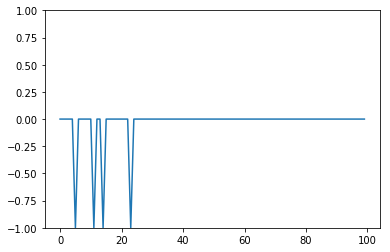

In [14]:
from pylab import plot, ylim
ylim([-1,1])
plot(errors)

## Multilayer Perceptron

<img src="http://scikit-learn.org/stable/_images/multilayerperceptron_network.png" alt="multilayer perceptron" width="500" height="600" >


In [3]:
from sklearn.neural_network import MLPClassifier

Training

In [4]:
X = [[0., 0.], [1., 1.]]
y = [0, 1]
clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X, y)

/home/ajaque/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

Test

In [5]:
clf.predict([[2., 2.], [-1., -2.]])

array([1, 0])

MLP can fit a non-linear model to the training data. clf.coefs_ contains the weight matrices that constitute the model parameters:

In [6]:
[coef.shape for coef in clf.coefs_]

[(2, 5), (5, 2), (2, 1)]

MLP trains using Backpropagation. More precisely, it trains using some form of gradient descent and the gradients are calculated using Backpropagation. For classification, it minimizes the Cross-Entropy loss function, giving a vector of probability estimates $P(y|x)$ per sample $x$:

In [7]:
clf.predict_proba([[2., 2.], [1., 2.]]) 

array([[ 0.39471358,  0.60528642],
       [ 0.39471358,  0.60528642]])

MLPClassifier supports multi-class classification by applying Softmax as the output function.

### Regularization

A comparison of different values for regularization parameter ‘alpha’ on synthetic datasets. The plot shows that different alphas yield different decision functions.


Alpha is a parameter for regularization term, aka penalty term, that combats overfitting by constraining the size of the weights. Increasing alpha may fix high variance (a sign of overfitting) by encouraging smaller weights, resulting in a decision boundary plot that appears with lesser curvatures. Similarly, decreasing alpha may fix high bias (a sign of underfitting) by encouraging larger weights, potentially resulting in a more complicated decision boundary.

Automatically created module for IPython interactive environment


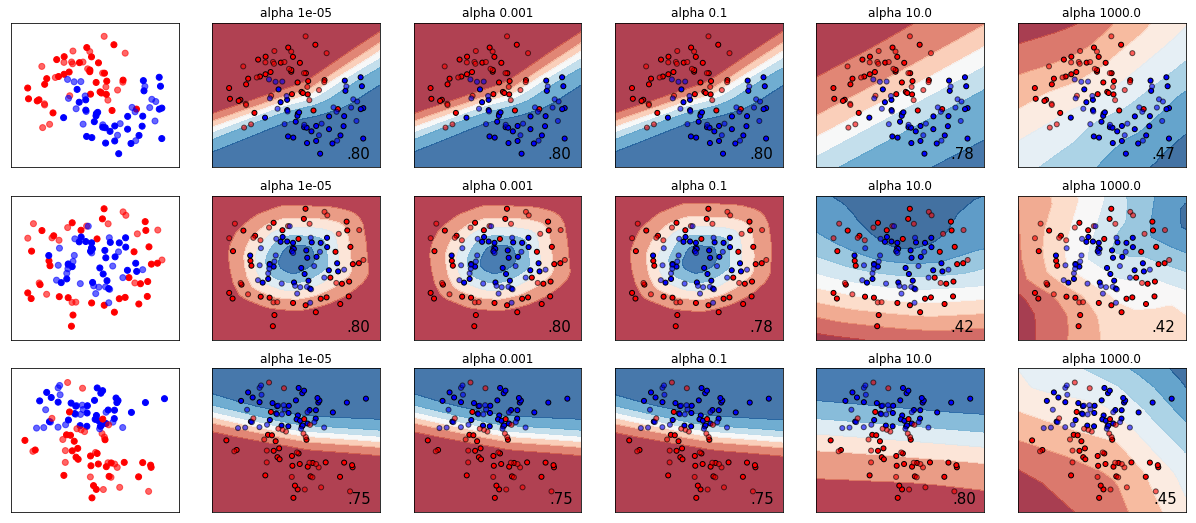

In [8]:
print(__doc__)


# Author: Issam H. Laradji
# License: BSD 3 clause

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier

h = .02  # step size in the mesh

alphas = np.logspace(-5, 3, 5)
names = []
for i in alphas:
    names.append('alpha ' + str(i))

classifiers = []
for i in alphas:
    classifiers.append(MLPClassifier(alpha=i, random_state=1))

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=0, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

figure = plt.figure(figsize=(17, 9))
i = 1
# iterate over datasets
for X, y in datasets:
    # preprocess dataset, split into training and test part
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='black', s=25)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6, edgecolors='black', s=25)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()